# Import the libraries

In [64]:
import os

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import decomposition

from allensdk.brain_observatory.ecephys.ecephys_project_cache import EcephysProjectCache

In [65]:
%matplotlib notebook

In [66]:
manifest_path = os.path.join("swdb_2019_neuropixels", "manifest.json")

lims_config = {
    "pg_kwargs": {
        "dbname": "lims2_nileg",
        "host": "aibsdc-dev-db1",
        "port": 5432,
        "user": "limsreader",
        "password": "limsro"
    },
    "app_kwargs": {
        "host": "axon:4000"
    }
}

cache = EcephysProjectCache.from_lims(manifest=manifest_path, lims_kwargs=lims_config)

## WALK-THROUGH 1: Plot the firing rate of the firing rate of different units (extracellular spines) in different stimulus conditions


### find the session with drifting gratings

In [67]:
session_id = 797828357
session = cache.get_session_data(session_id)

### create a function to plot the raster plot

In [68]:
def plot_raster(spike_times, start, end):
    num_units = len(spike_times)
    ystep = 1 / num_units

    ymin = 0
    ymax = ystep

    for unit_id, unit_spike_times in spike_times.items():
        unit_spike_times = unit_spike_times[np.logical_and(unit_spike_times >= start, unit_spike_times < end)]
        plt.vlines(unit_spike_times, ymin=ymin, ymax=ymax)

        ymin += ystep
        ymax += ystep
        

In [69]:
drifting_gratings_presentation_onsets = session.stimulus_presentations.loc[
    session.stimulus_presentations["stimulus_name"] == "drifting_gratings", 
    "start_time"
].values
start, end = drifting_gratings_presentation_onsets[:2]

/Users/Anatoly/dynamic_brain/lib/python3.7/site-packages/pandas/core/ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


<IPython.core.display.Javascript object>


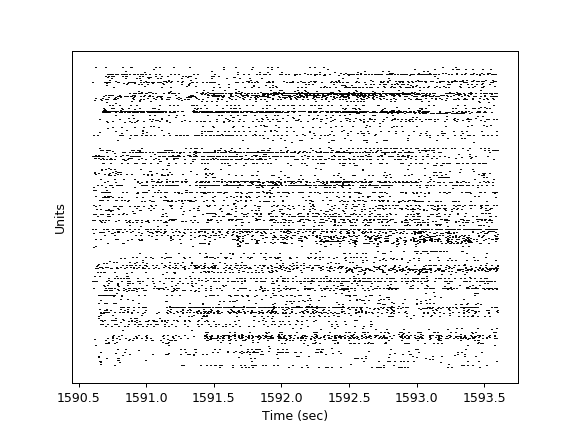

In [70]:
plot_raster(session.spike_times, start, end)
plt.xlabel('Time (sec)')
plt.ylabel('Units')
plt.tick_params(axis="y", labelleft=False, left=False)
plt.show()


### plot the session with spontaneous activity

In [71]:
spon = session.stimulus_presentations.loc[
    session.stimulus_presentations["stimulus_name"] == "spontaneous_activity", 
    ["start_time", "stop_time"]
]
spon_start, spon_end = spon.iloc[3].values

In [73]:
plot_raster(session.spike_times, spon_start, spon_end)
plt.xlabel('Time (sec)')
plt.ylabel('Units')
plt.tick_params(axis="y", labelleft=False, left=False)
plt.show()

### arrange neurons by their firing rate

<IPython.core.display.Javascript object>


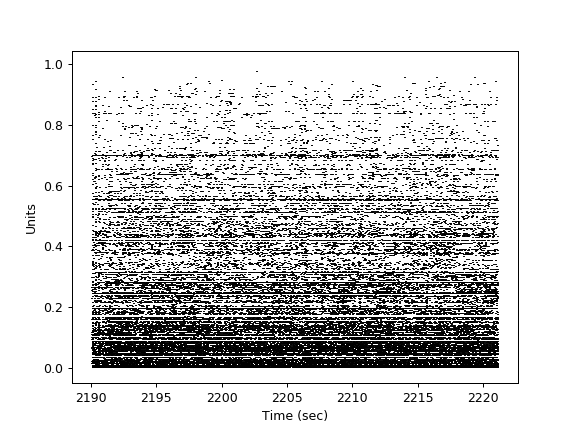

In [74]:
# arrange by firing-rate

by_fr = session.units.sort_values(by="firing_rate", ascending=False)
spike_times_by_firing_rate = {
    uid: session.spike_times[uid] for uid in by_fr.index.values
}

%matplotlib notebook

plot_raster(spike_times_by_firing_rate, spon_start, spon_end)
plt.ylabel('Units')
plt.xlabel('Time (sec)')
plt.show()


### sort units by their firing-rate

#### Comments: 1) remove hide the quality column; 2) remove sampling rate column - it is the same!  3) remove valid_data

In [24]:
session.units.sort_values(by="firing_rate", ascending=False)

,firing_rate,isi_violations,local_index_unit,peak_channel_id,quality,snr,channel_local_index,structure_acronym,structure_id,probe_horizontal_position,probe_id,probe_vertical_position,valid_data,probe_description,location,sampling_rate
unit_id,,,,,,,,,,,,,,,,
849863666,61.721757,0.396491,34,849862930,good,6.181049,50,MB,313.0,59,805579738,520,True,probeB,,30000.0
849859986,57.216175,0.377878,63,849859200,good,2.667946,54,TH,549.0,59,805579749,560,True,probeE,,30000.0
849862586,48.380680,0.478456,202,849861966,good,1.053274,276,VISp,385.0,43,805579741,2780,True,probeC,,30000.0
849858796,47.876740,0.339305,40,849858046,good,4.189728,49,TH,549.0,11,805579753,500,True,probeF,,30000.0
849858780,46.943069,0.444439,32,849858024,good,1.792003,38,TH,549.0,59,805579753,400,True,probeF,,30000.0
849858744,44.362515,0.371696,14,849857984,good,6.865120,18,TH,549.0,59,805579753,200,True,probeF,,30000.0
849857532,43.949894,0.255526,4,849856772,good,5.274026,8,TH,549.0,43,805579734,100,True,probeA,,30000.0
849859904,43.526920,0.429703,22,849859128,good,3.645981,18,TH,549.0,59,805579749,200,True,probeE,,30000.0
849862474,42.726156,0.560464,146,849861800,good,7.075353,193,CA,375.0,11,805579741,1940,True,probeC,,30000.0


# 2 WALK-THROUGH: Unit QC metrics

### show the qc metrics of differnet units

In [27]:
session.units.head()

,firing_rate,isi_violations,local_index_unit,peak_channel_id,quality,snr,channel_local_index,structure_acronym,structure_id,probe_horizontal_position,probe_id,probe_vertical_position,valid_data,probe_description,location,sampling_rate
unit_id,,,,,,,,,,,,,,,,
849857524,1.821709,5.442067,0,849856756,good,0.606343,0,TH,549.0,43,805579734,20,True,probeA,,30000.0
849857526,12.607066,0.145777,1,849856760,good,5.457787,2,TH,549.0,59,805579734,40,True,probeA,,30000.0
849857528,4.320684,0.557281,2,849856764,good,1.446961,4,TH,549.0,43,805579734,60,True,probeA,,30000.0
849857530,7.992601,1.098819,3,849856764,good,0.643716,4,TH,549.0,43,805579734,60,True,probeA,,30000.0
849857534,1.081308,3.214073,5,849856774,good,3.633457,9,TH,549.0,11,805579734,100,True,probeA,,30000.0


### narrow down the session parameters

In [30]:

session_params = session.units.loc[:, ["structure_acronym", "probe_id","firing_rate", "isi_violations", "snr",'probe_vertical_position']]
session_params.head()


,structure_acronym,probe_id,firing_rate,isi_violations,snr,probe_vertical_position
unit_id,,,,,,
849857524,TH,805579734,1.821709,5.442067,0.606343,20
849857526,TH,805579734,12.607066,0.145777,5.457787,40
849857528,TH,805579734,4.320684,0.557281,1.446961,60
849857530,TH,805579734,7.992601,1.098819,0.643716,60
849857534,TH,805579734,1.081308,3.214073,3.633457,100


### sort the current session parameters by ISI violations

In [32]:
session_params.sort_values(by="isi_violations").head()

,structure_acronym,probe_id,firing_rate,isi_violations,snr,probe_vertical_position
unit_id,,,,,,
849857928,DG,805579734,0.021022,0.0,4.344313,1100
849862378,VISp,805579741,0.023579,0.0,0.829705,2800
849860006,TH,805579749,0.009622,0.0,0.962463,680
849857628,CA,805579734,0.009517,0.0,2.263364,1980
849857668,VISam,805579734,0.014246,0.0,4.948467,2340


### describe what is the isi violation? write the down the equation for that!
Metrics

1) ISI violation: equation, then plot spike train with the clear spike violation!
2) from Josh: get the ISI, FR etc as metrics where the data is good! what are the thresholds for the good data? SNR + ISI violations

### plot the ISI violation distribution

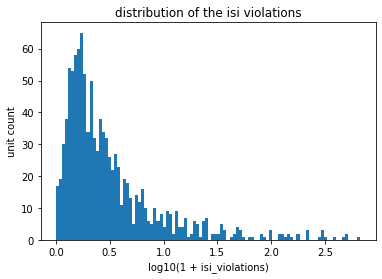

In [34]:
plt.subplots()

plt.hist(np.log10(1 + session_params["isi_violations"].values), bins=100)
plt.xlabel('log10(1 + isi_violations)')
plt.ylabel('unit count')
plt.title('distribution of the isi violations')
plt.show()

### describe the area with reasonable qc metrics

In [45]:


good_units = session_params[
    (session_params["isi_violations"] < 0.2)
    & (session_params["snr"] > 2)
]

print('Number of units with reasonable ISI and SNR')
print(good_units.shape[0])
print(good_units)

Number of units with reasonable ISI and SNR
32
          structure_acronym   probe_id  firing_rate  isi_violations       snr  \
unit_id                                                                         
849857526                TH  805579734    12.607066        0.145777  5.457787   
849857928                DG  805579734     0.021022        0.000000  4.344313   
849857628                CA  805579734     0.009517        0.000000  2.263364   
849857656                CA  805579734     5.674971        0.101282  2.569781   
849857668             VISam  805579734     0.014246        0.000000  4.948467   
849857672             VISam  805579734     3.601778        0.190788  2.377500   
849857700             VISam  805579734     3.667461        0.048548  3.493881   
849857714             VISam  805579734     0.618549        0.107845  3.226458   
849857772             VISam  805579734    11.084661        0.077937  5.687762   
849857782             VISam  805579734     9.761802        0.1

### plot the structure names

In [47]:
session.units["structure_acronym"].unique()


array(['TH', 'DG', 'CA', 'VISam', 'MB', 'VISpm', 'VISp', 'VISl', 'VISal',
       'VISrl'], dtype=object)

### plot the distribution of the probe vertical positions

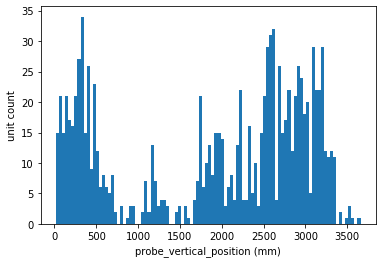

In [17]:

plt.subplots()
plt.hist(session_params["probe_vertical_position"].values, bins=100)
plt.xlabel('probe_vertical_position (mm)')
plt.ylabel('unit count')
plt.show()



# 2 WALK-THROUGH: plot the firing rate of the units with regards to structures


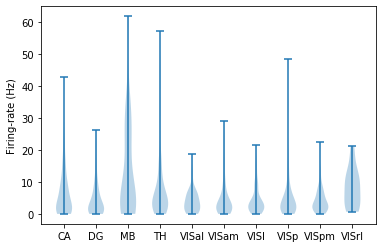

In [48]:
gb = session.units.groupby("structure_acronym")

structures = []
data = []

for group in gb:
    structure, current_data = group
    structures.append(structure)
    data.append(current_data["firing_rate"].values)

axs = plt.gca()
    
plt.violinplot(data)

axs.set_xticks(np.arange(len(structures))+1)
axs.set_xticklabels(structures)
plt.ylabel('Firing-rate (Hz)')
plt.show()


# 3 WALK-THROUGH: channel average waveforms

### plot the matrix of average waveforms on the particular probe

Text(0, 0.5, 'Channel #')

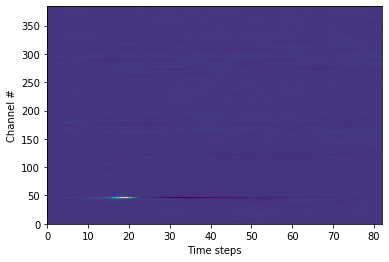

In [50]:
unit = session.units.index.values[400]
wf = session.mean_waveforms[unit]

fig, ax = plt.subplots()
plt.pcolormesh(wf)
plt.xlabel('Time steps')
plt.ylabel('Channel #')

### plot all peak channels recorded in the dentate gyrus (DG)

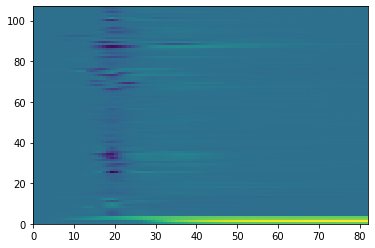

In [51]:
fig, ax = plt.subplots()

th_unit_ids = session.units[session.units["structure_acronym"] == "DG"].index.values

peak_waveforms = []

for unit_id in th_unit_ids:

    peak_ch = session.units.loc[unit_id, "peak_channel_id"]
    unit_mean_waveforms = session.mean_waveforms[unit_id]

    peak_waveforms.append(unit_mean_waveforms.loc[{"channel_id": peak_ch}])
    
    
time_domain = unit_mean_waveforms["time"]

peak_waveforms = np.array(peak_waveforms)
plt.pcolormesh(peak_waveforms)

### show the pca of the average waveforms to make sure the units make sense

In [52]:
# apply pca to the averaged waveforms

pca = decomposition.PCA(n_components=2)
pca.fit(peak_waveforms)


PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

### plot 2 PCA components of the averaged waveforms

Explained variance of 2 components
[0.89120241 0.06117076]


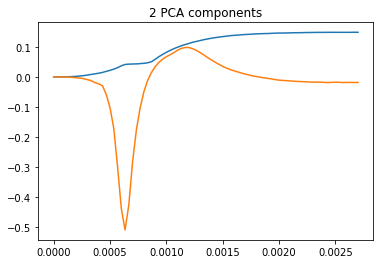

In [58]:
plt.plot(time_domain, pca.components_.T)
plt.title('2 PCA components')

print('Explained variance of 2 components')
print(pca.explained_variance_ratio_)

# 4 Exercise: plot the cross-correllogram of spontaneous activity

### show the cross-correlogram of the spontaneous activity

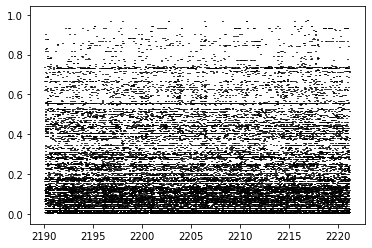

In [59]:
# arrange by firing-rate

by_fr = session.units.sort_values(by="firing_rate", ascending=False)
spike_times_by_firing_rate = {
    uid: session.spike_times[uid] for uid in by_fr.index.values
}
#plot_raster(spike_times_by_firing_rate, start, end)
plot_raster(spike_times_by_firing_rate, spon_start, spon_end)
plt.show()


### plot the presentation session times

In [26]:
spon.head()

,start_time,stop_time
stimulus_presentation_id,,
0,29.229048,89.295798
3646,1001.357974,1290.349498
3797,1588.848986,1590.600498
3998,2190.118333,2221.144258
21999,2821.646438,2851.671498


### create the histograms

In [61]:
first_spon_id = spon.index.values[0]
first_spon_duration = spon.loc[first_spon_id, "stop_time"] - spon.loc[first_spon_id, "start_time"]

# 1 - sec
time_step = 1 / 100
time_domain = np.arange(0.0, first_spon_duration + time_step, time_step)

histograms = session.presentationwise_spike_counts(
    bin_edges=time_domain,
    stimulus_presentation_ids=[first_spon_id],
    unit_ids=None
)

histograms

<xarray.Dataset>
Dimensions:                          (stimulus_presentation_id: 1, time_relative_to_stimulus_onset: 6007, unit_id: 1076)
Coordinates:
  * stimulus_presentation_id         (stimulus_presentation_id) int64 0
  * time_relative_to_stimulus_onset  (time_relative_to_stimulus_onset) float64 0.005 ... 60.06
  * unit_id                          (unit_id) int64 849857524 ... 849859070
Data variables:
    spike_counts                     (stimulus_presentation_id, time_relative_to_stimulus_onset, unit_id) uint16 0 ... 0

### compute the mean of the histograms

In [62]:
mean_histograms = histograms.mean(dim="stimulus_presentation_id")

### plot the firing rate of neurons in different units

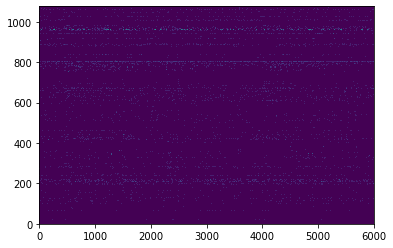

In [63]:

plt.pcolormesh(mean_histograms["spike_counts"].T)

In [54]:
mean_histograms["spike_counts"]

<xarray.DataArray 'spike_counts' (time_relative_to_stimulus_onset: 6007, unit_id: 1076)>
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])
Coordinates:
  * time_relative_to_stimulus_onset  (time_relative_to_stimulus_onset) float64 0.005 ... 60.06
  * unit_id                          (unit_id) int64 849857524 ... 849859070

In [65]:
# test code for correlation

spike_counts = mean_histograms.spike_counts.values
time = mean_histograms["time_relative_to_stimulus_onset"]

hist_train_1=spike_counts[:,0]
hist_train_2=spike_counts[:,1]

Text(0.5, 0, 'Time (sec)')

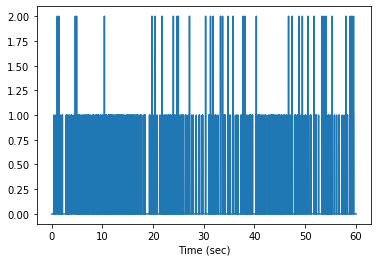

In [62]:
# plot one hist-binned spike train

plt.plot(time, hist_train_1)
plt.xlabel('Time (sec)')

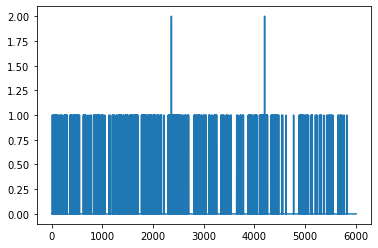

In [58]:
plt.plot(hist_train_2)

In [63]:
np.correlate(hist_train_1,hist_train_2)

array([39.])

In [66]:
num_units = spike_counts.shape[1]

correlations = np.zeros((num_units, num_units))

for ii in range(num_units):
    for jj in range(ii, num_units):
        correlations[ii, jj] = np.correlate(spike_counts[:, ii], spike_counts[:, jj])

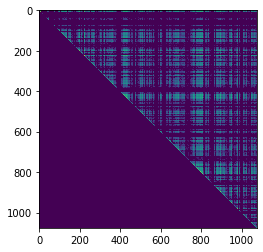

In [68]:
plt.imshow(np.log10(correlations+1))